# Lab 4: Support Vector Machines, Neural Networks and Convolutional Neural Networks

Using 13D Wine Dataset

In [1]:
from platform import python_version

print(python_version())

3.7.7


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf

# Load Data

In [3]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')


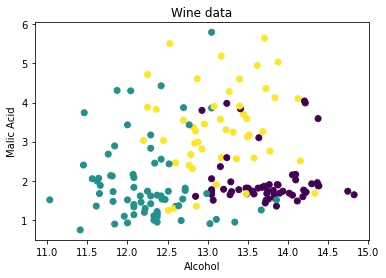

In [4]:

plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()


Split data into testing and training 80-20 split

In [5]:
#wineData, wineLabels = shuffle(wineData, wineLabels, random_state=0) #make sure the samples are not ordered
xTrn, xTst, yTrn, yTst = train_test_split(wineData, wineLabels, test_size=0.2)

In [27]:
print(xTst)

[[1.267e+01 9.800e-01 2.240e+00 1.800e+01 9.900e+01 2.200e+00 1.940e+00
  3.000e-01 1.460e+00 2.620e+00 1.230e+00 3.160e+00 4.500e+02]
 [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
  3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.251e+01 1.240e+00 2.250e+00 1.750e+01 8.500e+01 2.000e+00 5.800e-01
  6.000e-01 1.250e+00 5.450e+00 7.500e-01 1.510e+00 6.500e+02]
 [1.237e+01 1.210e+00 2.560e+00 1.810e+01 9.800e+01 2.420e+00 2.650e+00
  3.700e-01 2.080e+00 4.600e+00 1.190e+00 2.300e+00 6.780e+02]
 [1.349e+01 3.590e+00 2.190e+00 1.950e+01 8.800e+01 1.620e+00 4.800e-01
  5.800e-01 8.800e-01 5.700e+00 8.100e-01 1.820e+00 5.800e+02]
 [1.247e+01 1.520e+00 2.200e+00 1.900e+01 1.620e+02 2.5

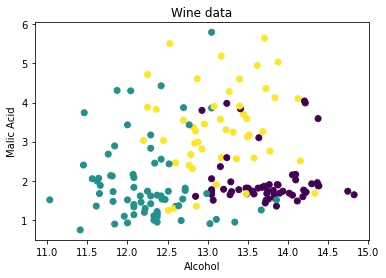

In [6]:
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# Plot showing test/train split

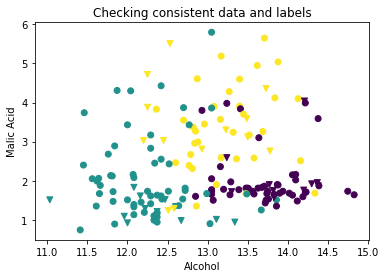

In [7]:
plt.figure()

plt.scatter(xTrn[:,0], xTrn[:,1], c=yTrn, marker="o")
plt.scatter(xTst[:,0], xTst[:,1], c=yTst, marker='v')
# Add title and axis names
plt.title('Checking consistent data and labels')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()

# Task 4.1 - Multiclass SVM for Wine Data

### Use standardScalr to standardise the class

In [8]:
normaliser = StandardScaler()
XTrn = normaliser.fit_transform(xTrn)
XTst = normaliser.transform(xTst)

In [29]:
print(xTst)
print(XTst)

[[1.267e+01 9.800e-01 2.240e+00 1.800e+01 9.900e+01 2.200e+00 1.940e+00
  3.000e-01 1.460e+00 2.620e+00 1.230e+00 3.160e+00 4.500e+02]
 [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
  3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.251e+01 1.240e+00 2.250e+00 1.750e+01 8.500e+01 2.000e+00 5.800e-01
  6.000e-01 1.250e+00 5.450e+00 7.500e-01 1.510e+00 6.500e+02]
 [1.237e+01 1.210e+00 2.560e+00 1.810e+01 9.800e+01 2.420e+00 2.650e+00
  3.700e-01 2.080e+00 4.600e+00 1.190e+00 2.300e+00 6.780e+02]
 [1.349e+01 3.590e+00 2.190e+00 1.950e+01 8.800e+01 1.620e+00 4.800e-01
  5.800e-01 8.800e-01 5.700e+00 8.100e-01 1.820e+00 5.800e+02]
 [1.247e+01 1.520e+00 2.200e+00 1.900e+01 1.620e+02 2.5

### create and train a multiclass svm

In [9]:
svc = SVC(C = 2.0, kernel='sigmoid')
svc.fit(XTrn, yTrn)

SVC(C=2.0, kernel='sigmoid')

### Predict test data and find accuracy

In [26]:
print(XTst.shape)
print(yTst.shape)
print(XTst)
print(XTrn)

(36,)
(36,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[-1.03783212 -0.83499827  0.56779765 ...  2.24003564 -0.60129444
  -1.26539373]
 [ 0.68734309 -0.5793813   0.31662237 ...  0.11264886  0.51812622
   1.25365995]
 [-1.93144806  0.03227357  0.17309363 ... -0.70209501  1.02186552
  -0.37631596]
 ...
 [-0.16903885  2.04982174  0.38838673 ... -1.87894727 -1.1190265
  -0.37631596]
 [ 1.50649103 -0.60676884 -0.25749257 ... -0.06840533  0.90992345
   0.75972785]
 [-1.7949234  -0.28724763  3.0795505  ... -0.11366888  1.44164826
  -0.90317686]]


In [33]:
svc.predict(xTst)
svc.score(xTst, yTst)

0.2777777777777778

### Visualise test data in scatter plot, colour the ground truth values and draw a scatter plot to visualise test data with predicted class values coloured

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Feature 1 Dimension - Alcohol')
axes[0].set_xlabel('Feature 0 Dimension - Malic Acid')

axes[1].set_title('Predicted Labels')

axes[0].scatter(XTst[:,0], XTst[:,1], c=yTst, marker="o")
axes[1].scatter(XTst[:,0], XTst[:,1], c=yTst, marker='v')
fig.tight_layout()




# 4.2 - Neural Network for Wine Data

In [11]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(yTrn)), activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [13]:
history = model.fit(XTrn, yTrn, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 1.2170 - sparse_categorical_accuracy: 0.2779 - val_loss: 1.1102 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1608 - sparse_categorical_accuracy: 0.3193 - val_loss: 1.0934 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1378 - sparse_categorical_accuracy: 0.2745 - val_loss: 1.0778 - val_sparse_categorical_accuracy: 0.2759
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1205 - sparse_categorical_accuracy: 0.2981 - val_loss: 1.0630 - val_sparse_categorical_accuracy: 0.3103
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1021 - sparse_categorical_accuracy: 0.3478 - val_loss: 1.0497 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0623 - sparse_categorical_accuracy: 0.379

4/4 [==============================] - 0s 8ms/step - loss: 0.6699 - sparse_categorical_accuracy: 0.7600 - val_loss: 0.7734 - val_sparse_categorical_accuracy: 0.7586
Epoch 48/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7138 - sparse_categorical_accuracy: 0.7569 - val_loss: 0.7682 - val_sparse_categorical_accuracy: 0.7586
Epoch 49/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6710 - sparse_categorical_accuracy: 0.7813 - val_loss: 0.7633 - val_sparse_categorical_accuracy: 0.7586
Epoch 50/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6537 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.7585 - val_sparse_categorical_accuracy: 0.7586
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6380 - sparse_categorical_accuracy: 0.7953 - val_loss: 0.7539 - val_sparse_categorical_accuracy: 0.7586
Epoch 52/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6199 - sparse_categorical_accuracy: 0.7942 - val_

4/4 [==============================] - 0s 8ms/step - loss: 0.3775 - sparse_categorical_accuracy: 0.9406 - val_loss: 0.5277 - val_sparse_categorical_accuracy: 0.8621
Epoch 94/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3591 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.5226 - val_sparse_categorical_accuracy: 0.8621
Epoch 95/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3684 - sparse_categorical_accuracy: 0.9458 - val_loss: 0.5168 - val_sparse_categorical_accuracy: 0.8621
Epoch 96/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5113 - val_sparse_categorical_accuracy: 0.8621
Epoch 97/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3580 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.5067 - val_sparse_categorical_accuracy: 0.8621
Epoch 98/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3297 - sparse_categorical_accuracy: 0.9671 - val_

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


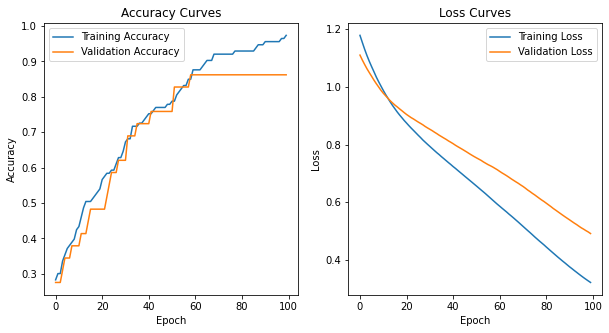

In [15]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [34]:
results = model.evaluate(xTst, yTst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 2ms/step - loss: 114.7241 - sparse_categorical_accuracy: 0.3611
Test set loss: 114.72, test set accuracy: 36.11%


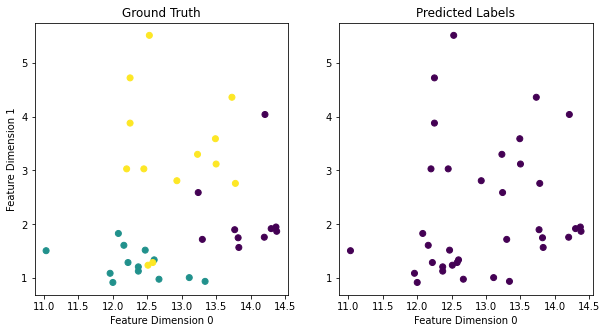

In [35]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(xTst[:,0], xTst[:,1], c=yTst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(xTst[:,0], xTst[:,1], c=np.argmax(model.predict(xTst), axis=1))
plt.show()

# 4.3 Neural Network for Digit Recognition

Load in MNIST dataset

In [38]:
(x_train, y_train), (x_test, y_test) = tf. keras.datasets.mnist.load_data()

In [39]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


### Flatten the data to pass it into a dense network

In [45]:
X_train = np.reshape(x_train, (60000, 784))
X_test = np.reshape(x_test, (10000, 784))

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_test[:,0], X_test[:,1], c=np.argmax(model.predict(X_test), axis=1))
plt.show()

### Normalise data by dividing by 255 (the max val in original data)

In [46]:
NNnormaliser = StandardScaler()
X_train = NNnormaliser.fit_transform(X_train)
X_test = NNnormaliser.transform(X_test)

### Create and train a tensorflow fully connected neural network on the training set

In [47]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

In [48]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [49]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 1s 529us/step - loss: 1.7313 - sparse_categorical_accuracy: 0.3968 - val_loss: 1.0063 - val_sparse_categorical_accuracy: 0.6553
Epoch 2/100
1500/1500 [==============================] - 1s 479us/step - loss: 0.9723 - sparse_categorical_accuracy: 0.6605 - val_loss: 0.8306 - val_sparse_categorical_accuracy: 0.6982
Epoch 3/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.8115 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.7147 - val_sparse_categorical_accuracy: 0.7549
Epoch 4/100
1500/1500 [==============================] - 1s 474us/step - loss: 0.7002 - sparse_categorical_accuracy: 0.7688 - val_loss: 0.6100 - val_sparse_categorical_accuracy: 0.8103
Epoch 5/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.5941 - sparse_categorical_accuracy: 0.8159 - val_loss: 0.5528 - val_sparse_categorical_accuracy: 0.8372
Epoch 6/100
1500/1500 [==============================] - 1s 474us/step - lo

1500/1500 [==============================] - 1s 474us/step - loss: 0.3997 - sparse_categorical_accuracy: 0.8803 - val_loss: 0.4223 - val_sparse_categorical_accuracy: 0.8770
Epoch 46/100
1500/1500 [==============================] - 1s 470us/step - loss: 0.4013 - sparse_categorical_accuracy: 0.8822 - val_loss: 0.4222 - val_sparse_categorical_accuracy: 0.8726
Epoch 47/100
1500/1500 [==============================] - 1s 476us/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.4226 - val_sparse_categorical_accuracy: 0.8739
Epoch 48/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.3968 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.4293 - val_sparse_categorical_accuracy: 0.8738
Epoch 49/100
1500/1500 [==============================] - 1s 474us/step - loss: 0.3935 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8756
Epoch 50/100
1500/1500 [==============================] - 1s 478us/step - loss: 0.3

1500/1500 [==============================] - 1s 470us/step - loss: 0.3746 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.4188 - val_sparse_categorical_accuracy: 0.8758
Epoch 90/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.3844 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8729
Epoch 91/100
1500/1500 [==============================] - 1s 470us/step - loss: 0.3787 - sparse_categorical_accuracy: 0.8881 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8751
Epoch 92/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.3785 - sparse_categorical_accuracy: 0.8876 - val_loss: 0.4161 - val_sparse_categorical_accuracy: 0.8790
Epoch 93/100
1500/1500 [==============================] - 1s 474us/step - loss: 0.3798 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.4167 - val_sparse_categorical_accuracy: 0.8768
Epoch 94/100
1500/1500 [==============================] - 1s 474us/step - loss: 0.3

### Predict labels for testing set and check accurancy

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (32, 4)                   3140      
_________________________________________________________________
dense_4 (Dense)              (32, 10)                  50        
_________________________________________________________________
dense_5 (Dense)              (32, 10)                  110       
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________


In [53]:
results = model.evaluate(X_test, y_test)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 0s 556us/step - loss: 0.4292 - sparse_categorical_accuracy: 0.8740
Test set loss: 0.43, test set accuracy: 87.40%


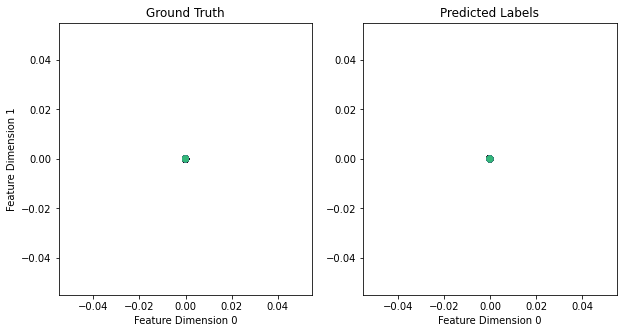

In [55]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_test[:,0], X_test[:,1], c=np.argmax(model.predict(X_test), axis=1))
plt.show()

### Plot models training curves

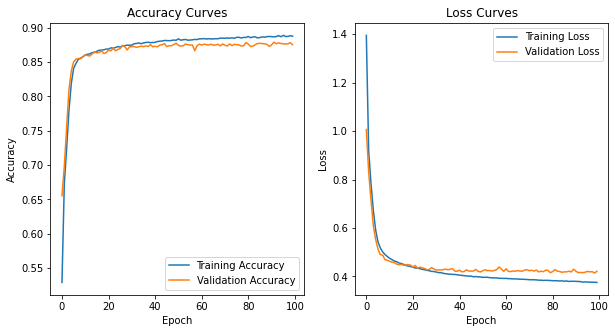

In [56]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Change hyper parameters

# 4.4 Convolutional Neural Network for Digit Recognition

### Load original MNIST dataset

### Use a CNN, expland the data to include a channel dimension. 

### Normalise the data

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

###  Predict labels for the testing set and check accuracy

### Plot models traing curves 